In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


I then used undersampling with feeforward neural network. I wanted to compare the performance of FNN and random forest. It turned out that random forest is better. It is easier to interpret and its accuracy and precision are higher.

## Load the data



In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Redback_B/Heart_2022/heart_2022_no_nans.csv')

In [4]:
df.shape # examine the shape and determine its rank

(246022, 40)

In [5]:
# Show data types and number of null values for each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [6]:
from sklearn.model_selection import train_test_split

# Split the dataset into majority class ('No') and minority class ('Yes')
df_majority = df[df['HadHeartAttack'] == 'No']
df_minority = df[df['HadHeartAttack'] == 'Yes']

fraction_to_keep = 0.4

# Randomly sample a portion
df_majority_sampled = df_majority.sample(frac=fraction_to_keep, random_state=42)

# Combine the two to make a balanced dataset
df_balanced = pd.concat([df_minority, df_majority_sampled])

# Shuffle the rows
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
df = df_balanced.copy()

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# separate features and labels
X = df.drop('HadHeartAttack', axis=1)
y = df['HadHeartAttack']

# split the data into training, validation, and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, stratify=y_val_test, random_state=42)

# Now I will use X_train, X_test, X_val and y_train, y_test, y_val

In [8]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [9]:
object_columns = X_train.select_dtypes(include=['object']).columns.tolist()
print(object_columns)

['State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'RemovedTeeth', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']


In [10]:
columns_to_check = ['LastCheckupTime', 'RemovedTeeth', 'SmokerStatus',
                    'ECigaretteUsage', 'RaceEthnicityCategory',
                    'AgeCategory', 'TetanusLast10Tdap']
for column in columns_to_check:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")

LastCheckupTime: ['Within past 2 years (1 year but less than 2 years ago)'
 'Within past year (anytime less than 12 months ago)'
 'Within past 5 years (2 years but less than 5 years ago)'
 '5 or more years ago']
RemovedTeeth: ['None of them' '1 to 5' 'All' '6 or more, but not all']
SmokerStatus: ['Never smoked' 'Former smoker' 'Current smoker - now smokes every day'
 'Current smoker - now smokes some days']
ECigaretteUsage: ['Never used e-cigarettes in my entire life' 'Not at all (right now)'
 'Use them some days' 'Use them every day']
RaceEthnicityCategory: ['Hispanic' 'White only, Non-Hispanic' 'Black only, Non-Hispanic'
 'Other race only, Non-Hispanic' 'Multiracial, Non-Hispanic']
AgeCategory: ['Age 35 to 39' 'Age 45 to 49' 'Age 70 to 74' 'Age 80 or older'
 'Age 18 to 24' 'Age 75 to 79' 'Age 50 to 54' 'Age 65 to 69'
 'Age 55 to 59' 'Age 60 to 64' 'Age 25 to 29' 'Age 40 to 44'
 'Age 30 to 34']
TetanusLast10Tdap: ['Yes, received tetanus shot but not sure what type' 'Yes, received Tdap

In [11]:
numeric_columns = X_train.select_dtypes(include=['number']).columns.tolist()
print(numeric_columns)

['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']


In [12]:
# Use LabelEncoder to convert object columns
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder instance
label_encoder = LabelEncoder()

# Loop through object columns and apply label encoding
for column in object_columns:
    X_train[column] = label_encoder.fit_transform(X_train[column])
    X_test[column] = label_encoder.transform(X_test[column])
    X_val[column] = label_encoder.transform(X_val[column])


# Normalize numerical columns
scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])
X_val[numeric_columns] = scaler.transform(X_val[numeric_columns])

In [13]:
# Apply label encoding to target variables
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
y_val = label_encoder.transform(y_val)

In [14]:
# Convert all numbers to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')
y_val = y_val.astype('float32')

In [15]:
print(f'Shape of my datasets are: {X_train.shape}, {X_test.shape} and {X_val.shape}.')

Shape of my datasets are: (63882, 39), (21294, 39) and (21294, 39).


## Setting up a model for training

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import models, layers, optimizers, utils

# Set Python random seed
np.random.seed(42)
# Set TensorFlow random seed
tf.random.set_seed(42)

# Set input_shape as (39,) based on the number of features in X_train
input_shape = (39,)

'''model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # sigmoid activation for binary classification
])'''

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(16, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid', kernel_initializer='he_normal')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2560      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 10401 (40.63 KB)
Trainable params: 10401 (

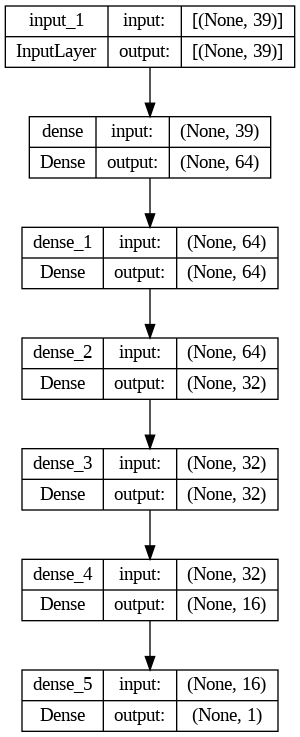

In [18]:
# plot my model
utils.plot_model(model=model,  # provide the model to be plotted
                 to_file='model_plot_Binary_Classification.png', # name of the file to be saved as
                 show_shapes=True, # whether to display shape information
                 show_layer_names=True, # whether to display layer names
                 rankdir='TB', # TB creates a vertical plot; LR creates a horizontal plot
                 expand_nested=True) # recursively expand nested models

In [19]:
print(f'Shape of my datasets are: {X_train.shape}, {X_test.shape} and {X_val.shape}.')

Shape of my datasets are: (63882, 39), (21294, 39) and (21294, 39).


## Fitting the model

In [20]:
# Compile the model
'''model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),  # Changed to binary crossentropy
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)'''


model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.F1Score()
    ]
)

In [21]:
# save the initial weights for later experiments
init_weights = model.get_weights() # Get the initial weights of the network

In [22]:
# Train the model
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_val, y_val))

Epoch 1/20
1997/1997 [==============================] - 10s 4ms/step - loss: 0.2782 - binary_accuracy: 0.8943 - precision: 0.6527 - recall: 0.3470 - f1_score: 0.2241 - val_loss: 0.2484 - val_binary_accuracy: 0.9083 - val_precision: 0.7083 - val_recall: 0.4645 - val_f1_score: 0.2241
Epoch 2/20
1997/1997 [==============================] - 7s 4ms/step - loss: 0.2542 - binary_accuracy: 0.9051 - precision: 0.6858 - recall: 0.4571 - f1_score: 0.2241 - val_loss: 0.2446 - val_binary_accuracy: 0.9099 - val_precision: 0.7002 - val_recall: 0.5006 - val_f1_score: 0.2241
Epoch 3/20
1997/1997 [==============================] - 7s 4ms/step - loss: 0.2505 - binary_accuracy: 0.9047 - precision: 0.6821 - recall: 0.4586 - f1_score: 0.2241 - val_loss: 0.2434 - val_binary_accuracy: 0.9098 - val_precision: 0.6924 - val_recall: 0.5136 - val_f1_score: 0.2241
Epoch 4/20
1997/1997 [==============================] - 8s 4ms/step - loss: 0.2482 - binary_accuracy: 0.9068 - precision: 0.6865 - recall: 0.4815 - f1_sc

In [23]:
# Evaluate the model
results = model.evaluate(X_test, y_test)
results

666/666 [==============================] - 2s 3ms/step - loss: 0.2685 - binary_accuracy: 0.9028 - precision: 0.6659 - recall: 0.4607 - f1_score: 0.2242


[0.26850318908691406,
 0.9027895331382751,
 0.6659494638442993,
 0.46073687076568604,
 array([0.22417033], dtype=float32)]

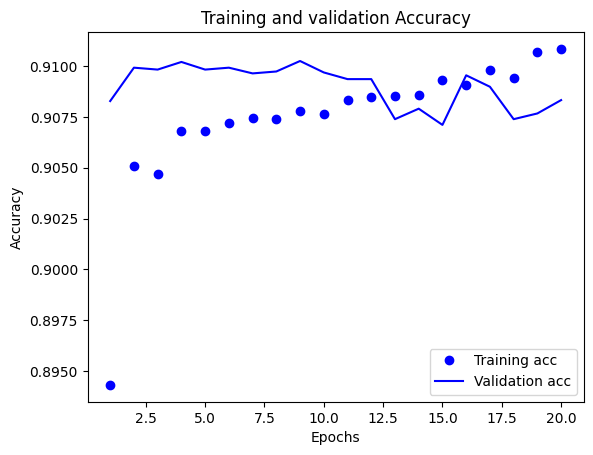

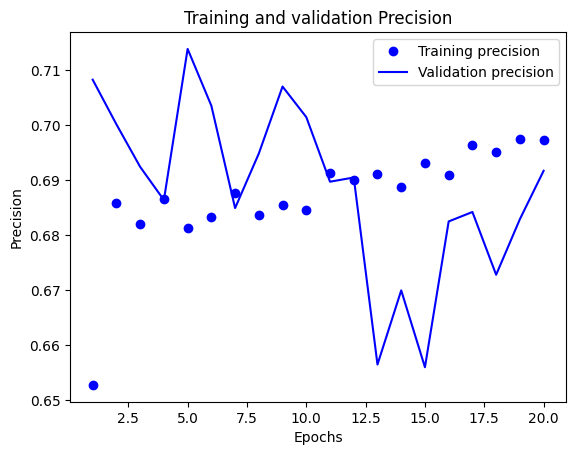

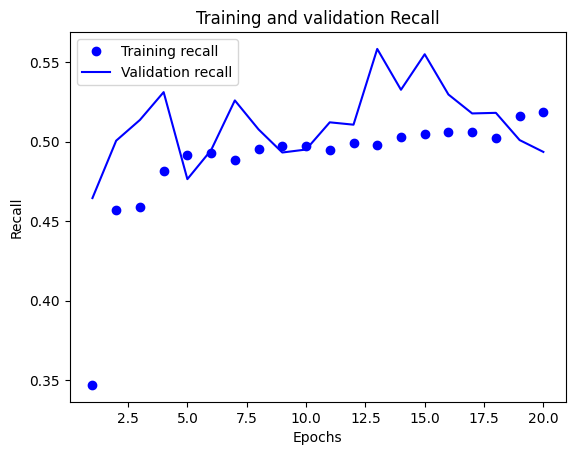

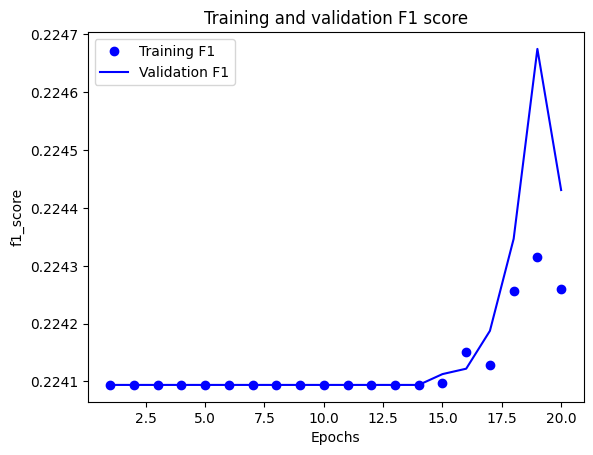

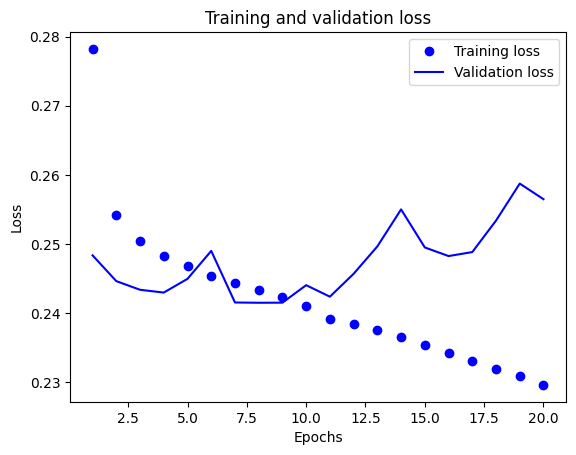

In [24]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

prec = history.history['precision']
val_prec = history.history['val_precision']

recal = history.history['recall']
val_recal = history.history['val_recall']

f1 = history.history['f1_score']
val_f1 = history.history['val_f1_score']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, prec, 'bo', label='Training precision')
plt.plot(epochs, val_prec, 'b', label='Validation precision')
plt.title('Training and validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()

plt.plot(epochs, recal, 'bo', label='Training recall')
plt.plot(epochs, val_recal, 'b', label='Validation recall')
plt.title('Training and validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

plt.plot(epochs, f1, 'bo', label='Training F1')
plt.plot(epochs, val_f1, 'b', label='Validation F1')
plt.title('Training and validation F1 score')
plt.xlabel('Epochs')
plt.ylabel('f1_score')
plt.legend()
plt.show()


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Apply regularisation

In [25]:
model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
    layers.Dropout(0.5),
    layers.Dense(16, activation='relu', kernel_initializer='he_normal'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid', kernel_initializer='he_normal')
])

'''model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy'])'''

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.F1Score()
    ]
)

# Train the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val, y_val))

Epoch 1/10
1997/1997 [==============================] - 9s 4ms/step - loss: 0.6929 - binary_accuracy: 0.8352 - precision_1: 0.1301 - recall_1: 0.0538 - f1_score: 0.2239 - val_loss: 0.3937 - val_binary_accuracy: 0.8738 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_f1_score: 0.2241
Epoch 2/10
1997/1997 [==============================] - 9s 5ms/step - loss: 0.3800 - binary_accuracy: 0.8733 - precision_1: 0.0571 - recall_1: 2.4811e-04 - f1_score: 0.2241 - val_loss: 0.3548 - val_binary_accuracy: 0.8738 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_f1_score: 0.2241
Epoch 3/10
1997/1997 [==============================] - 7s 3ms/step - loss: 0.3463 - binary_accuracy: 0.8736 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - f1_score: 0.2243 - val_loss: 0.3219 - val_binary_accuracy: 0.8738 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_f1_score: 0.2241
Epoch 4/10
1997/1997 [==============================] - 10s 5ms/step - loss: 0.3258 - binary_a

In [26]:
# Evaluate the model
results = model.evaluate(X_test, y_test)
results

666/666 [==============================] - 1s 2ms/step - loss: 0.2973 - binary_accuracy: 0.8738 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - f1_score: 0.2241


[0.2972981333732605,
 0.8738142251968384,
 0.0,
 0.0,
 array([0.22409406], dtype=float32)]

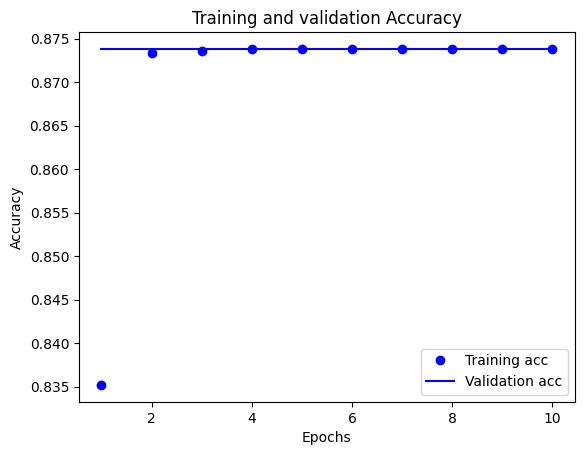

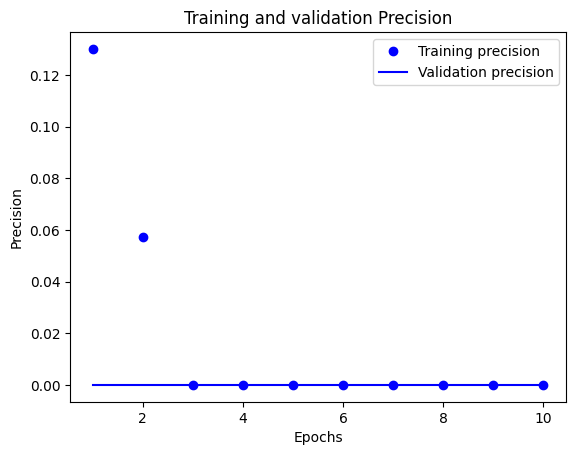

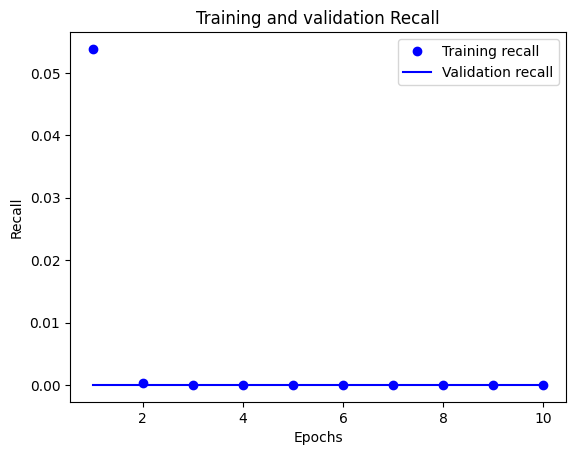

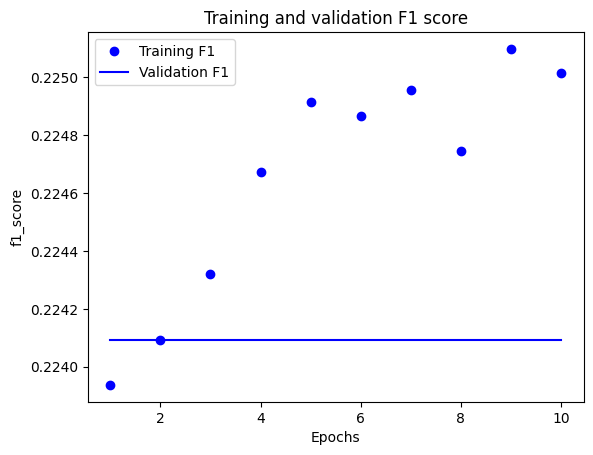

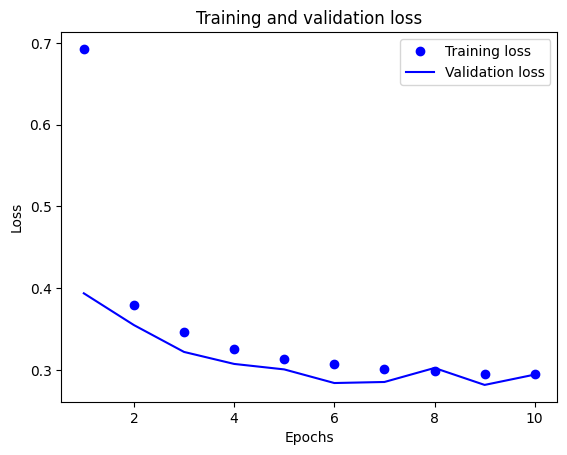

In [27]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

prec = history.history['precision_1']
val_prec = history.history['val_precision_1']

recal = history.history['recall_1']
val_recal = history.history['val_recall_1']

f1 = history.history['f1_score']
val_f1 = history.history['val_f1_score']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, prec, 'bo', label='Training precision')
plt.plot(epochs, val_prec, 'b', label='Validation precision')
plt.title('Training and validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()

plt.plot(epochs, recal, 'bo', label='Training recall')
plt.plot(epochs, val_recal, 'b', label='Validation recall')
plt.title('Training and validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

plt.plot(epochs, f1, 'bo', label='Training F1')
plt.plot(epochs, val_f1, 'b', label='Validation F1')
plt.title('Training and validation F1 score')
plt.xlabel('Epochs')
plt.ylabel('f1_score')
plt.legend()
plt.show()


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()